Linear Programming (OPER 610) Project


Optimal
Optimal
Optimal
(x1,x2) is optimal at (50.0, 50.0)
0.00697994232178 seconds of CPU time (GLPK).
0.0075478553772 seconds of CPU time (COIN/CBC).
0.00260400772095 seconds of CPU time (CPLEX).


/home/fergieis/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Humor Sans', u'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


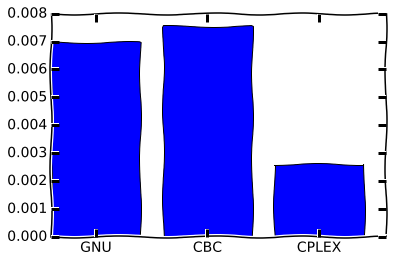

In [1]:
%matplotlib inline
import matplotlib.pyplot as pp
import numpy as np
from pulp import *
import timeit

# Decision variables
x = [0, LpVariable("x1", 0, 100), LpVariable("x2", 0, 100)]
# 0<= x1 <= 100 & 0<= x2 <= 100
 
# Setup Problem -- are LpMax and LpMin statics for 0,1 or -1,1?
p = LpProblem("problem", LpMaximize)
 
# Set up matrix A and vector b
p += 2*x[1]+x[2] <= 150
p += x[1]+x[2] <= 100
p += x[1]<=50
#strictly necessary?
p += x[1]>=0
p += x[2]>=0
 
# ObjFunc
p += 3*x[1]+2*x[2]

Solvr = 0    
time = []


GNULPK = Solvr

# Pass to GNU Solver
start = timeit.default_timer()
status = p.solve(GLPK(msg=0))
time.append(timeit.default_timer() - start)
print(LpStatus[status])

Solvr +=1
CBC = Solvr
#CBC
start = timeit.default_timer()
status = p.solve()
time.append(timeit.default_timer() - start)
print(LpStatus[status])

Solvr += 1
GUR = Solvr
#CPLEX
start = timeit.default_timer()
status = p.solve(CPLEX(msg=0))
time.append(timeit.default_timer() - start)
print(LpStatus[status])

#GUROBI
# Pull license with grbgetkey from an academic ip address
# call for second test license

print("(x1,x2) is optimal at (" + str(value(x[1])) + ", "+ str(value(x[2])) + ")" )
print(str(time[0]) + " seconds of CPU time (GLPK).")
print(str(time[1]) + " seconds of CPU time (COIN/CBC).")
print(str(time[2]) + " seconds of CPU time (CPLEX).")

pp.xkcd()
ind = np.arange(3)
chart_1 = pp.bar(ind, time)
pp.xticks(ind+.8/2,  ("GNU", "CBC", "CPLEX"))
pp.show()
